In [2]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [3]:
raw_data = yfinance.download(tickers="AAPL, GS, JPM", interval='1d', group_by='ticker', auto_adjust=True)

[*********************100%***********************]  3 of 3 completed


In [4]:
data = raw_data.copy()

In [5]:
# Extracting Closing Prices
data['aapl'] = data['AAPL'].Close
data['gs'] = data['GS'].Close
data['jpm'] = data['JPM'].Close

# Creating Returns
data['ret_aapl'] = data['aapl'].pct_change(1).mul(100)
data['ret_gs'] = data['gs'].pct_change(1).mul(100)
data['ret_jpm'] = data['jpm'].pct_change(1).mul(100)

# Creating Squared Returns
data['sq_aapl'] = data.ret_aapl.mul(data.ret_aapl)
data['sq_gs'] = data.ret_gs.mul(data.ret_gs)
data['sq_jpm'] = data.ret_jpm.mul(data.ret_jpm)

# Extracting Volume
data['q_aapl'] = data['AAPL'].Volume
data['q_gs'] = data['GS'].Volume
data['q_jpm'] = data['JPM'].Volume

In [6]:
data = data.asfreq('b')
data = data.bfill()

In [7]:
del data["AAPL"]
del data["GS"]
del data["JPM"]

In [8]:
#start date
start_date = "2013-08-01"

#announced to accept
ann = "2019-03-01"

#announce to renew till 2029
ann2 = "2022-10-01"

#announced to suspend
ann3 = "2023-11-28"

#end date
end_date = "2025-01-05"

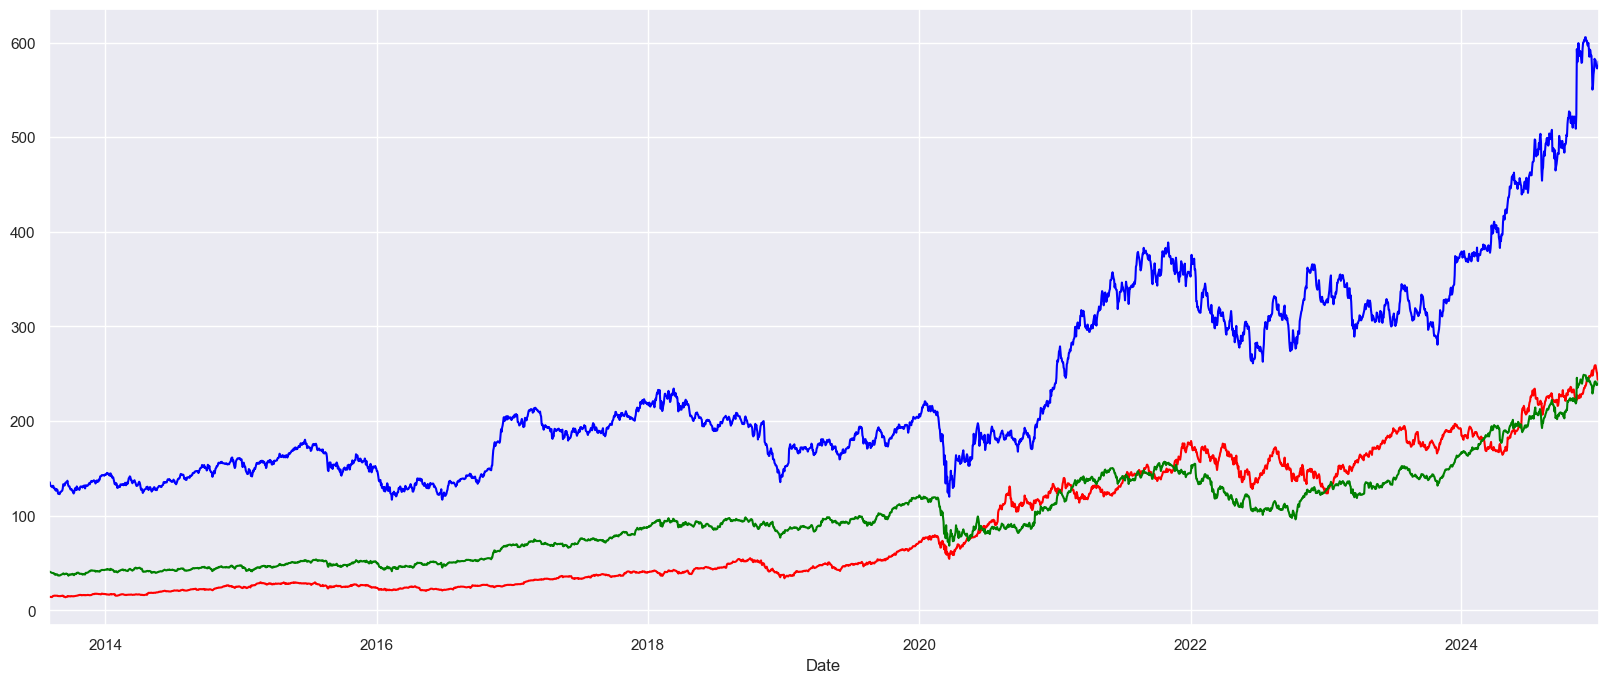

In [9]:
data.aapl[start_date:end_date].plot(figsize=(20,8), color='red')
data.gs[start_date:end_date].plot(color='blue')
data.jpm[start_date:end_date].plot(color='green')
plt.show()

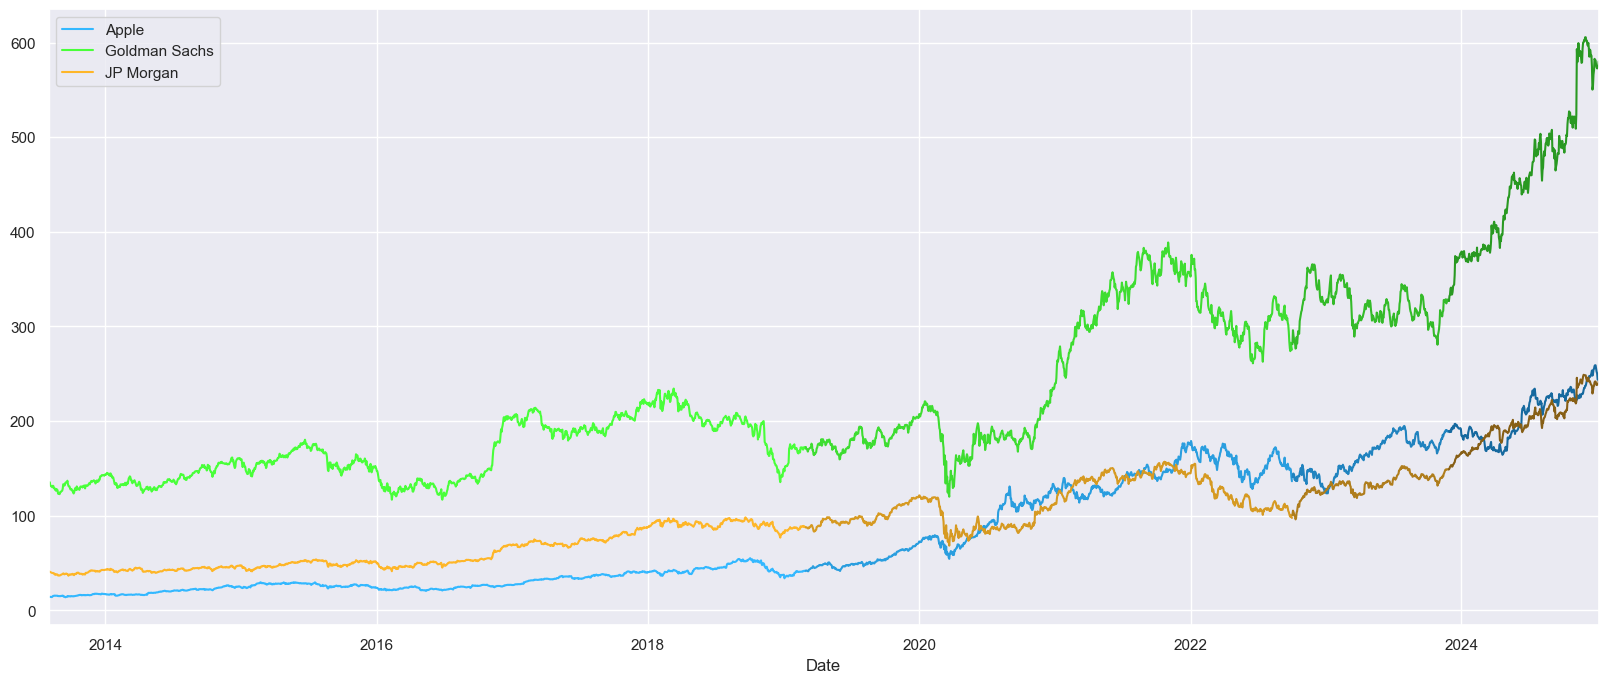

In [10]:
data['aapl'][start_date:ann].plot(figsize= (20,8), color = "#33B8FF")
data['gs'][start_date:ann].plot(color = "#49FF3A")
data['jpm'][start_date:ann].plot(color = "#FEB628")

data['aapl'][ann:ann2].plot(figsize= (20,8), color = "#2A9EDF")
data['gs'][ann:ann2].plot(color = "#3EDD31")
data['jpm'][ann:ann2].plot(color = "#D69A22")

data['aapl'][ann2:ann3].plot(figsize= (20,8), color = "#2083BF")
data['gs'][ann2:ann3].plot(color = "#34BB29")
data['jpm'][ann2:ann3].plot(color = "#AF7D1C")

data['aapl'][ann3:end_date].plot(figsize= (20,8), color = "#16699F")
data['gs'][ann3:end_date].plot(color = "#299922")
data['jpm'][ann3:end_date].plot(color = "#875F16")

plt.legend(['Apple','Goldman Sachs','JP Morgan'])

plt.show()

In [11]:
print('Correlation ' + str(start_date) + ' to ' + str(end_date)+ '\n')
print('Apple and Goldman Sachs correlation: \t\t'+ str(data['aapl'][start_date:end_date].corr(data['gs'][start_date:end_date])))
print('Apple and JP Morgan correlation: \t\t'+ str(data['aapl'][start_date:end_date].corr(data['jpm'][start_date:end_date])))
print('Goldman Sachs and JP Morgan correlation: \t'+ str(data['gs'][start_date:end_date].corr(data['jpm'][start_date:end_date])))

Correlation 2013-08-01 to 2025-01-05

Apple and Goldman Sachs correlation: 		0.9273964048268468
Apple and JP Morgan correlation: 		0.9238516360572995
Goldman Sachs and JP Morgan correlation: 	0.956173596873374


In [12]:
print('Correlation ' + str(start_date) + ' to ' + str(ann)+ '\n')
print('Apple and Goldman Sachs correlation: \t\t'+ str(data['aapl'][start_date:ann].corr(data['gs'][start_date:ann])))
print('Apple and JP Morgan correlation: \t\t'+ str(data['aapl'][start_date:ann].corr(data['jpm'][start_date:ann])))
print('Goldman Sachs and JP Morgan correlation: \t'+ str(data['gs'][start_date:ann].corr(data['jpm'][start_date:ann])))

Correlation 2013-08-01 to 2019-03-01

Apple and Goldman Sachs correlation: 		0.807707598347058
Apple and JP Morgan correlation: 		0.9406105270722239
Goldman Sachs and JP Morgan correlation: 	0.8566444818824122


In [13]:
print('Correlation ' + str(ann) + ' to ' + str(ann2)+ '\n')
print('Apple and Goldman Sachs correlation: \t\t'+ str(data['aapl'][ann:ann2].corr(data['gs'][ann:ann2])))
print('Apple and JP Morgan correlation: \t\t'+ str(data['aapl'][ann:ann2].corr(data['jpm'][ann:ann2])))
print('Goldman Sachs and JP Morgan correlation: \t'+ str(data['gs'][ann:ann2].corr(data['jpm'][ann:ann2])))

Correlation 2019-03-01 to 2022-10-01

Apple and Goldman Sachs correlation: 		0.8531362532308508
Apple and JP Morgan correlation: 		0.6601426812272922
Goldman Sachs and JP Morgan correlation: 	0.9089442504493033


In [14]:
print('Correlation ' + str(ann2) + ' to ' + str(ann3)+ '\n')
print('Apple and Goldman Sachs correlation: \t\t'+ str(data['aapl'][ann2:ann3].corr(data['gs'][ann2:ann3])))
print('Apple and JP Morgan correlation: \t\t'+ str(data['aapl'][ann2:ann3].corr(data['jpm'][ann2:ann3])))
print('Goldman Sachs and JP Morgan correlation: \t'+ str(data['gs'][ann2:ann3].corr(data['jpm'][ann2:ann3])))

Correlation 2022-10-01 to 2023-11-28

Apple and Goldman Sachs correlation: 		-0.2632193132796861
Apple and JP Morgan correlation: 		0.71454318112494
Goldman Sachs and JP Morgan correlation: 	0.23610037508367981


In [15]:
print('Correlation ' + str(ann3) + ' to ' + str(end_date)+ '\n')
print('Apple and Goldman Sachs correlation: \t\t'+ str(data['aapl'][ann3:end_date].corr(data['gs'][ann3:end_date])))
print('Apple and JP Morgan correlation: \t\t'+ str(data['aapl'][ann3:end_date].corr(data['jpm'][ann3:end_date])))
print('Goldman Sachs and JP Morgan correlation: \t'+ str(data['gs'][ann3:end_date].corr(data['jpm'][ann3:end_date])))

Correlation 2023-11-28 to 2025-01-05

Apple and Goldman Sachs correlation: 		0.854618487549104
Apple and JP Morgan correlation: 		0.7860714934411945
Goldman Sachs and JP Morgan correlation: 	0.9763961254402688


In [16]:
start_ann = auto_arima(data.aapl[start_date:ann], exogenous = data[['gs','jpm']][start_date:ann], m = 5, max_p = 5, max_q = 5)
ann_ann2 = auto_arima(data.aapl[ann:ann2], exogenous = data[['gs','jpm']][ann:ann2], m = 5, max_p = 5, max_q = 5)
ann2_ann3 = auto_arima(data.aapl[ann2:ann3], exogenous = data[['gs','jpm']][ann2:ann3], m = 5, max_p = 5, max_q = 5)
ann3_end = auto_arima(data.aapl[ann3:end_date], exogenous = data[['gs','jpm']][ann3:end_date], m = 5, max_p = 5, max_q = 5)

In [17]:
start_ann

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 5),
      suppress_warnings=True)

In [18]:
start_ann.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1457
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -996.087
Date:                Thu, 09 Jan 2025   AIC                           1996.174
Time:                        19:47:15   BIC                           2006.741
Sample:                    08-01-2013   HQIC                          2000.117
                         - 03-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0192      0.013      1.499      0.134      -0.006       0.044
sigma2         0.2300      0.004     61.389      0.000       0.223       0.237
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):              4693.43
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               5.25   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
ann_ann2

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 5),
      suppress_warnings=True)

In [20]:
ann_ann2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  936
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2109.450
Date:                Thu, 09 Jan 2025   AIC                           4224.901
Time:                        19:47:15   BIC                           4239.423
Sample:                    03-01-2019   HQIC                          4230.438
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1014      0.072      1.412      0.158      -0.039       0.242
ma.L1         -0.0569      0.025     -2.269      0.023      -0.106      -0.008
sigma2         5.3351      0.166     32.077      0.000       5.009       5.661
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               251.59
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.02   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
ann2_ann3

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 5),
      suppress_warnings=True, with_intercept=False)

In [22]:
ann2_ann3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  302
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -700.658
Date:                Thu, 09 Jan 2025   AIC                           1403.316
Time:                        19:47:15   BIC                           1407.023
Sample:                    10-03-2022   HQIC                          1404.800
                         - 11-28-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.1574      0.319     19.296      0.000       5.532       6.783
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               109.69
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
ann3_end

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 5),
      suppress_warnings=True, with_intercept=False)

In [24]:
ann3_end.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  289
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -703.407
Date:                Thu, 09 Jan 2025   AIC                           1408.814
Time:                        19:47:15   BIC                           1412.477
Sample:                    11-28-2023   HQIC                          1410.281
                         - 01-03-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.7438      0.406     19.088      0.000       6.949       8.539
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):               112.45
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                             0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
start_ann_gs = auto_arima(data.gs[start_date:ann], exogenous = data[['aapl','jpm']][start_date:ann], m = 5, max_p = 5, max_q = 5)
ann_ann2_gs = auto_arima(data.gs[ann:ann2], exogenous = data[['aapl','jpm']][ann:ann2], m = 5, max_p = 5, max_q = 5)
ann2_ann3_gs = auto_arima(data.gs[ann2:ann3], exogenous = data[['aapl','jpm']][ann2:ann3], m = 5, max_p = 5, max_q = 5)
ann3_end_gs = auto_arima(data.gs[ann3:end_date], exogenous = data[['aapl','jpm']][ann3:end_date], m = 5, max_p = 5, max_q = 5)

In [26]:
start_ann_gs

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 5),
      suppress_warnings=True, with_intercept=False)

In [27]:
start_ann_gs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1457
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3298.819
Date:                Thu, 09 Jan 2025   AIC                           6599.638
Time:                        19:47:46   BIC                           6604.922
Sample:                    08-01-2013   HQIC                          6601.610
                         - 03-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.4383      0.119     45.606      0.000       5.205       5.672
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):               861.65
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               3.24   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
ann_ann2_gs

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(2, 0, 0, 5),
      suppress_warnings=True)

In [29]:
ann_ann2_gs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  936
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 5)   Log Likelihood               -2783.476
Date:                            Thu, 09 Jan 2025   AIC                           5582.951
Time:                                    19:47:46   BIC                           5621.676
Sample:                                03-01-2019   HQIC                          5597.717
                                     - 09-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5754      0.585      0.983      0.326      -0.572       1.723
ar.L1         -1.7742      0.025    -70.237      0.000      -1.824      -1.725
ar.L2         -0.9585      0.025    -38.122      0.000      -1.008      -0.909
ma.L1          1.7400      0.033     52.474      0.000       1.675       1.805
ma.L2          0.9151      0.033     27.381      0.000       0.850       0.981
ar.S.L5       -0.0145      0.030     -0.491      0.623      -0.072       0.043
ar.S.L10      -0.0674      0.029     -2.297      0.022      -0.125      -0.010
sigma2        22.6663      0.769     29.493      0.000      21.160      24.173
===================================================================================
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):               203.07
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
ann2_ann3_gs

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 5),
      suppress_warnings=True, with_intercept=False)

In [31]:
ann2_ann3_gs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  302
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 5)   Log Likelihood                -891.506
Date:                           Thu, 09 Jan 2025   AIC                           1793.013
Time:                                   19:47:46   BIC                           1811.549
Sample:                               10-03-2022   HQIC                          1800.430
                                    - 11-28-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8810      0.120      7.332      0.000       0.645       1.116
ma.L1         -0.8011      0.148     -5.409      0.000      -1.091      -0.511
ar.S.L5        0.6724      0.113      5.925      0.000       0.450       0.895
ma.S.L5       -0.8440      0.086     -9.840      0.000      -1.012      -0.676
sigma2        21.8278      1.249     17.472      0.000      19.379      24.276
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                75.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.33
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
ann3_end_gs

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 5),
      suppress_warnings=True)

In [33]:
ann3_end_gs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  289
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -991.646
Date:                Thu, 09 Jan 2025   AIC                           1987.292
Time:                        19:47:46   BIC                           1994.618
Sample:                    11-28-2023   HQIC                          1990.227
                         - 01-03-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8790      0.492      1.787      0.074      -0.085       1.843
sigma2        57.3144      1.508     38.000      0.000      54.358      60.271
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6227.82
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               4.57   Skew:                             2.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.08258D+00    |proj g|=  7.87824D-01


 This problem is unconstrained.



At iterate    5    f=  1.75274D+00    |proj g|=  1.78370D-01

At iterate   10    f=  1.70626D+00    |proj g|=  7.51546D-02

At iterate   15    f=  1.69909D+00    |proj g|=  1.50595D-02

At iterate   20    f=  1.55455D+00    |proj g|=  2.20456D-01

At iterate   25    f=  1.51868D+00    |proj g|=  2.03946D-02

At iterate   30    f=  1.50869D+00    |proj g|=  3.19427D-03

At iterate   35    f=  1.50179D+00    |proj g|=  1.01694D-02

At iterate   40    f=  1.50148D+00    |proj g|=  3.82521D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40     59      1     0     0   3.825D-03   1.501D+00
  F =   1.50148372455

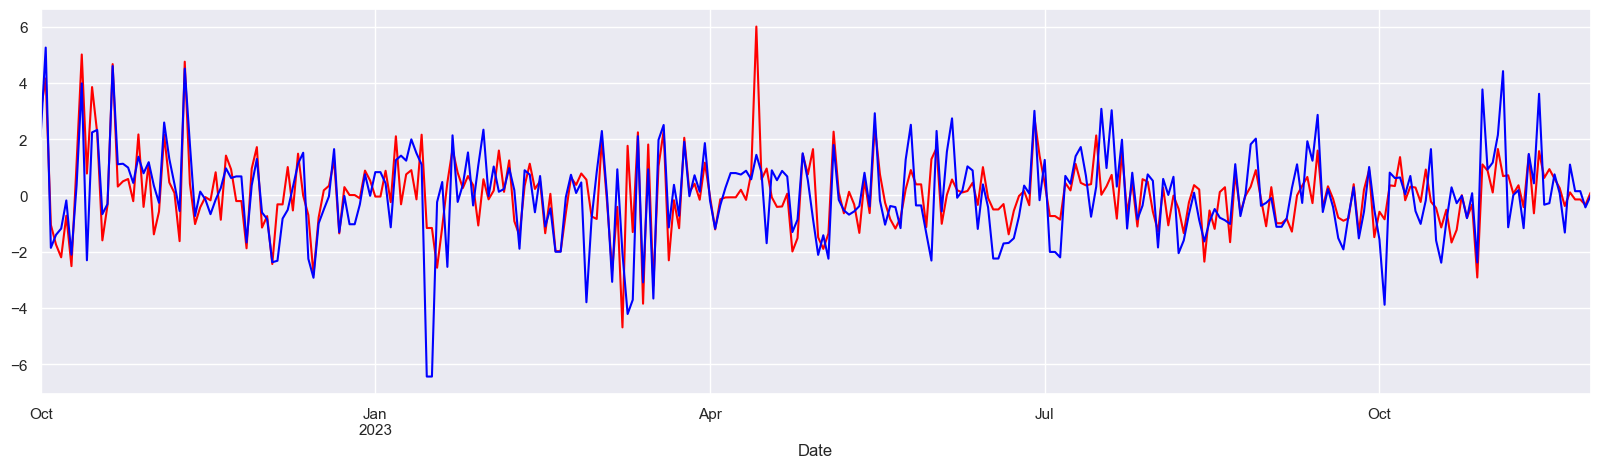

In [34]:
model_auto_pred_pr = SARIMAX(data.ret_gs[ann:ann2], exog = data[['ret_aapl', 'ret_jpm']][ann:ann2], order=(2,2,2), seasonal_order=(2,0,0,5))
res = model_auto_pred_pr.fit()

df_auto_pred_pr = res.predict(start=ann2, end=ann3, exog = data[['ret_aapl','ret_jpm']][ann2:ann3])
df_auto_pred_pr[ann2:ann3].plot(figsize = (20,5), color = "red")

data.ret_gs[ann2:ann3].plot(color = "blue")
plt.show()

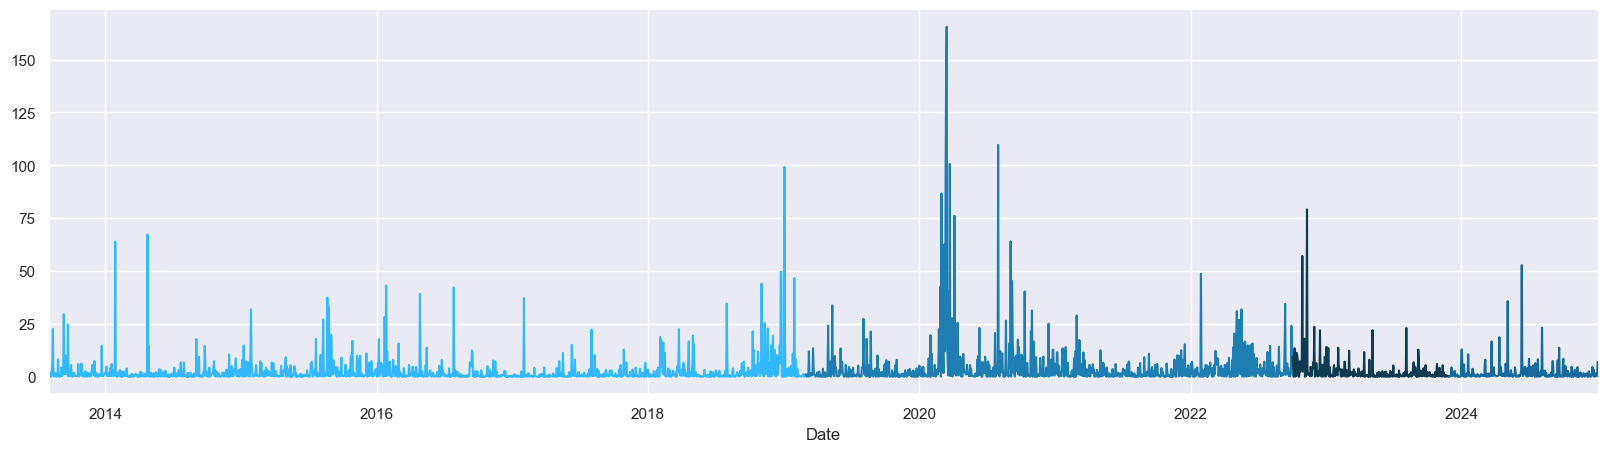

In [35]:
data['sq_aapl'][start_date:ann].plot(figsize = (20,5), color = "#33B8FF")
data['sq_aapl'][ann:ann2].plot(color = "#1E7EB2")
data['sq_aapl'][ann2:ann3].plot(color = "#0E3A52")
data['sq_aapl'][ann3:end_date].plot(color = "#16699F")      
plt.show()

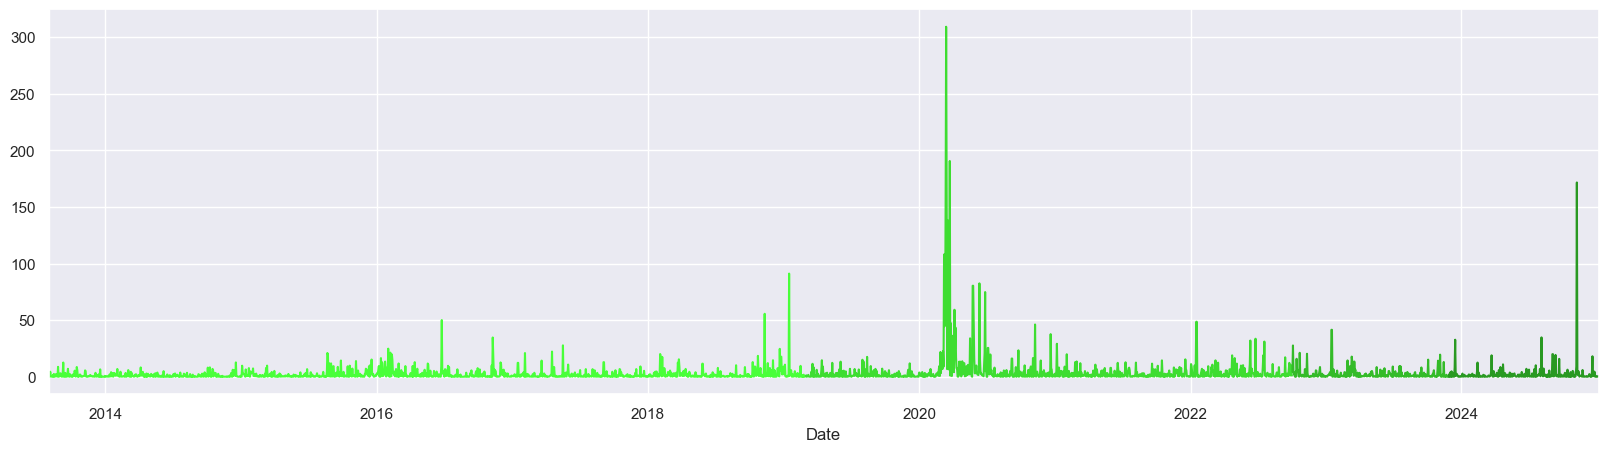

In [36]:
data['sq_gs'][start_date:ann].plot(figsize = (20,5), color = "#49FF3A")
data['sq_gs'][ann:ann2].plot(color = "#3EDD31")
data['sq_gs'][ann2:ann3].plot(color = "#34BB29")
data['sq_gs'][ann3:end_date].plot(color = "#299922")
plt.show()

In [76]:
mod_garch = arch_model(data.ret_gs[1:], vol = "GARCH", p = 1, q = 1, mean = "constant", dist = "Normal")
res_garch = mod_garch.fit(last_obs = start_date, update_freq = 10)

Iteration:     10,   Func. Count:     67,   Neg. LLF: 8764.803053621352
Iteration:     20,   Func. Count:    126,   Neg. LLF: 7097.323095872138
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7073.603664604022
            Iterations: 27
            Function evaluations: 168
            Gradient evaluations: 27


In [ ]:
pred_garch1 = res_garch1.forecast(horizon = 1, align = 'target')
pred_garch1.residual_variance[start_date:].plot(figsize = (20,5), color = "red", zorder = 2)
data.ret_aapl.abs().plot(color = "blue", zorder = 1)
plt.title("Volatility Predictions", size = 24)
plt.show()

In [82]:
pred_garch = res_garch.forecast(horizon = 100, align = 'target')
pred_garch.residual_variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-08,4.936268,5.257167,5.237982,5.060978,5.086788,5.114809,5.346904,5.680343,6.129591,6.485786,...,6.547984,6.466578,6.377439,6.419424,6.094816,6.549878,6.885783,7.306038,6.391864,6.582558


In [88]:
mod_garch1 = arch_model(data.ret_aapl[1:], vol = "GARCH", p = 1, q = 1, mean = "constant", dist = "Normal")
res_garch1 = mod_garch1.fit(last_obs = start_date, update_freq = 10)

Iteration:     10,   Func. Count:     64,   Neg. LLF: 21549.451450675064
Optimization terminated successfully    (Exit mode 0)
            Current function value: 21549.45143960665
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


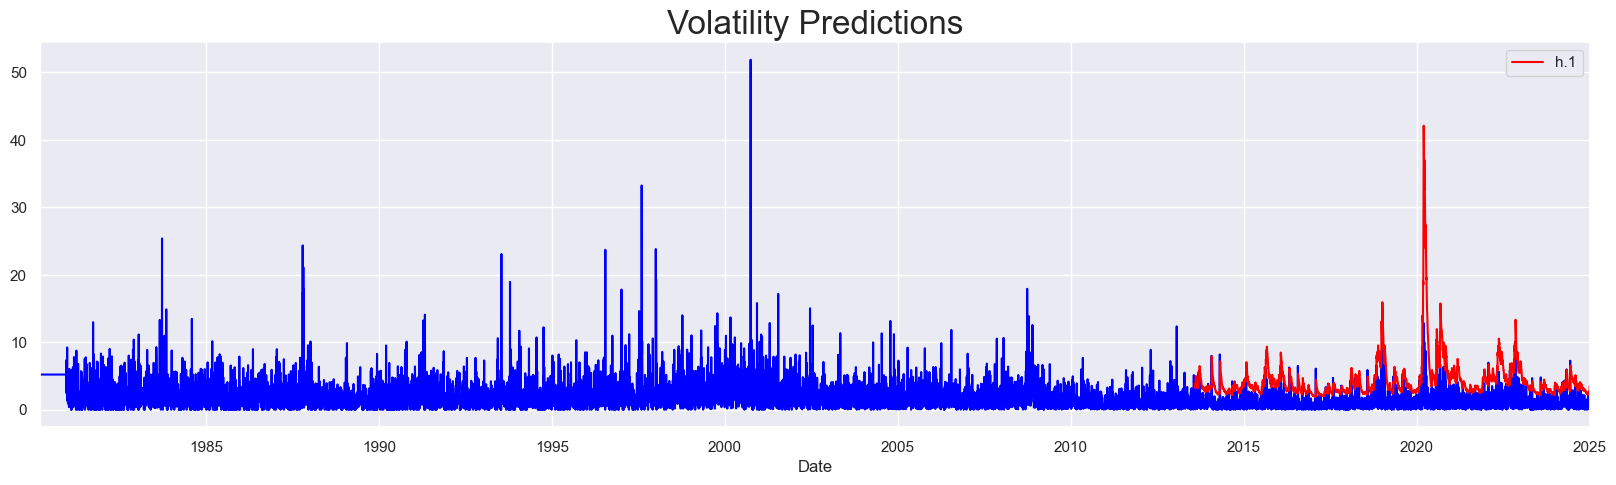

In [94]:
pred_garch1 = res_garch1.forecast(horizon = 1, align = 'target')
pred_garch1.residual_variance[start_date:].plot(figsize = (20,5), color = "red", zorder = 2)
data.ret_aapl.abs().plot(color = "blue", zorder = 1)
plt.title("Volatility Predictions", size = 24)
plt.show()

In [96]:
pred_garch1 = res_garch1.forecast(horizon = 100, align = 'target')
pred_garch1.residual_variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-08,3.250586,3.361546,3.582312,3.819181,3.493451,3.138248,3.264495,3.285018,3.299382,3.462531,...,9.475488,9.336566,9.185352,9.257175,9.290055,9.349364,9.428478,9.511075,9.575659,9.634994
